In [1]:
import line_detection_updated as ld
import image_rotation as ir
import satmetrics

from astropy.io import fits
import astropy.visualization as aviz

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline

import numpy as np

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from decimal import Decimal
from astropy.io import fits
from astropy.wcs import WCS
import os
from datetime import datetime, timedelta
import shutil
from pathlib import Path

def copy_and_rename_file(source_path, destination_folder, new_filename):
    try:
        source_path = Path(source_path)        

        destination_path_fits = Path(destination_folder) / f"{new_filename}.fits"
        shutil.copy(source_path, destination_path_fits)
        print(f"File copied successfully to {destination_path_fits}")

    except FileNotFoundError:
        print("Source file not found.")
    except PermissionError:
        print("Permission error. Make sure you have the necessary permissions.")


def degrees_to_radians(degrees):
    radians = degrees * (np.pi / 180)
    return radians

def plateSolve(filename):
    print(filename)
    fit_file = f'./Data/{filename}.fit'
    apm_file = f'./Data/{filename}.apm'

    with fits.open(fit_file) as hdul:
        exposure = hdul[0].header['EXPOSURE']
        date = (hdul[0].header['DATE-LOC'])[:-8]
        time = (hdul[0].header['DATE-LOC'])[-8:]
        print("date: "+date)

        # fitImageHeaderRA = hdul[0].header['RA']
        # fitImageHeaderDEC = hdul[0].header['DEC']
        fitImageHeaderRA = hdul[0].header['RA_DEG']
        fitImageHeaderDEC = hdul[0].header['DEC_DEG']

        H = hdul[0].header
        start_pix_scale = hdul[0].header['XPIXSZ ']

        if 'BIN' in H:
            start_pix_scale = H['BIN'] * start_pix_scale
        if 'BINNING' in H:
            start_pix_scale = H['BINNING'] * start_pix_scale
        print(hdul[0].data.shape)
        imSize = hdul[0].data.shape
        # PS_xminutes = imSize[1] * start_pix_scale / 60
        # PS_yminutes = imSize[0] * start_pix_scale / 60

        # # PlateSolve2 data
        # CCD_x_radians = PS_xminutes / 60 * np.pi / 180
        # CCD_y_radians = PS_yminutes / 60 * np.pi / 180
        PS_xseconds = imSize[1] / start_pix_scale
        PS_yseconds = imSize[0] / start_pix_scale
        # I am not sure if i should divide by 3.8 or multiplicate by 0.33, i think second one but i get better results with first one
        # Because pixelsize in arcsecs we calculate by Formula:   (   Pixel Size   /   Telescope Focal Length   )   X 206.265  


    plateSolve2Path = "E:\suto\PlateSolve2.28\PlateSolve2.28\PlateSolve2.exe"
    print(fitImageHeaderRA)
    print(fitImageHeaderDEC)
    RA_radians = degrees_to_radians(fitImageHeaderRA)
    DEC_radians = degrees_to_radians(fitImageHeaderDEC)
    CCD_x_radians = PS_xseconds * np.pi/(180*3600)
    CCD_y_radians = PS_yseconds * np.pi/(180*3600)

    # Wyświetlanie wyników
    print('RA:', fitImageHeaderRA)
    print('Dec:', fitImageHeaderDEC)

    # Wyświetlanie wyników
    print('RA header in radians:', RA_radians)
    print('Dec header in radians:', DEC_radians)

    print('CCDx in radians:', CCD_x_radians)
    print('CCDy  in radians:', CCD_y_radians)


    os.system(f"{plateSolve2Path} {RA_radians}, {DEC_radians},{CCD_x_radians},{CCD_y_radians},999,{fit_file},0")
    #   PLATE SOLVING ...

    with open(apm_file) as f:
        linesApm = f.readlines()
        print(linesApm)

    # Odczytanie wartości RA (Right Ascension) i DEC (Declination)
    radec_line = linesApm[0].strip()
    radec_parts = radec_line.split(',')
    ra_value = float(radec_parts[0] + "."+radec_parts[1])   

    dec_value = float(radec_parts[2] + "."+radec_parts[3])  

    # Odczytanie wartości rozmiaru piksela i kąta
    second_line = linesApm[1].strip()
    second_line_parts = second_line.split(',')
    pixel_size_value = float(second_line_parts[0] + "." + second_line_parts[1])  # Pierwsza część dla rozmiaru piksela

    angle_value = float(second_line_parts[2] + "." + second_line_parts[3])  # Druga część dla kąta

    # Wypisanie odczytanych wartości
    print(f"RA: {ra_value} radians")
    print(f"DEC: {dec_value} radians")
    print(f"Pixel Size: {pixel_size_value} arcsec")
    print(f"Angle: {angle_value}")
    print("time: "+time)

    solving_dict = {"Pixel Size": pixel_size_value,
                    "Exposure": exposure,
                    "Time": time,
                    "Datetime": hdul[0].header['DATE-LOC'],
                    "Image Size": imSize,
                    "Header RA": fitImageHeaderRA,
                    "Header DEC": fitImageHeaderDEC
                    }

    return solving_dict

In [2]:
current_user_filepath = 'Data'
# img1 = fits.open(current_user_filepath + '/tic.fit', cache = True)
img1 = current_user_filepath + '/tic.fit'

filename = "tic"
fit_file = f'./{current_user_filepath}/{filename}.fit'
# img1 = current_user_filepath + '/calexp-0941420_07.fits'
# img2 = current_user_filepath + '/calexp-0941422_33.fits'
# img3 = current_user_filepath + '/calexp-0941424_34.fits'
# img4 = current_user_filepath + '/calexp-0941426_16.fits'
# img5 = current_user_filepath + '/calexp-0941424_37.fits'
# img6 = current_user_filepath + '/STARLINK-1892-20220305200929.fits'
# img7 = current_user_filepath + '/STARLINK-1892-N-20220305200959.fits'
# img8 = current_user_filepath + '/STARLINK-1905-20220305191929.fits'
# img_multiple_streaks = current_user_filepath + '/bi327715.fits'

current_image_filepath = fit_file
image_dict = satmetrics.file_ingest(fit_file)
working_image = image_dict['image_list'][0] #Each fits file can have multiple science images. 

NameError: name 'satmetrics' is not defined

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from astropy.io import fits
import numpy as np

# Load your FITS image
fit_file = f'./{current_user_filepath}/{filename}.fit'
hdul = fits.open(fit_file)
image_data = hdul[0].data  # Assuming the image is in the primary HDU
hdul.close()

# Convert FITS image to a format compatible with ResNet
# You may need to resize or preprocess the image as required
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ResNet's mean and std
])
input_image = transform(image_data).unsqueeze(0)  # Add batch dimension

# Load pre-trained ResNet model
resnet_model = resnet18(pretrained=True)
resnet_model.eval()  # Set model to evaluation mode

# Forward pass to get predictions
with torch.no_grad():
    outputs = resnet_model(input_image)

# Assuming outputs is a tensor with shape (batch_size, num_classes)
# If you only need a single prediction, you can extract it like this:
prediction = torch.argmax(outputs, dim=1).item()

# You can define what each class represents based on your problem
# For example, if class 0 represents "no lines" and class 1 represents "lines"
# Then you can interpret the prediction accordingly
if prediction == 0:
    print("The image does not contain lines.")
else:
    print("The image contains lines.")


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/image.fit'

h:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
theta:  [-1.57079633 -1.56206968 -1.55334303 -1.54461639 -1.53588974 -1.5271631
 -1.51843645 -1.5097098  -1.50098316 -1.49225651 -1.48352986 -1.47480322
 -1.46607657 -1.45734993 -1.44862328 -1.43989663 -1.43116999 -1.42244334
 -1.41371669 -1.40499005 -1.3962634  -1.38753676 -1.37881011 -1.37008346
 -1.36135682 -1.35263017 -1.34390352 -1.33517688 -1.32645023 -1.31772359
 -1.30899694 -1.30027029 -1.29154365 -1.282817   -1.27409035 -1.26536371
 -1.25663706 -1.24791042 -1.23918377 -1.23045712 -1.22173048 -1.21300383
 -1.20427718 -1.19555054 -1.18682389 -1.17809725 -1.1693706  -1.16064395
 -1.15191731 -1.14319066 -1.13446401 -1.12573737 -1.11701072 -1.10828408
 -1.09955743 -1.09083078 -1.08210414 -1.07337749 -1.06465084 -1.0559242
 -1.04719755 -1.0384709  -1.02974426 -1.02101761 -1.01229097 -1.00356432
 -0.99483767 -0.98611103 -0.97738438 -0.96865773 -0.95993109 -0.951

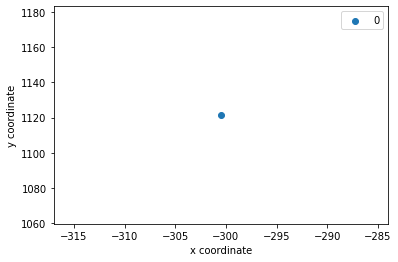

In [4]:
#Get the Hough transformation results
detector = ld.LineDetection(image=working_image.data)
results_ht = detector.hough_transformation()
print("results_ht:", results_ht)
clustered_lines = ld.cluster(results_ht["Cartesian Coordinates"], results_ht["Lines"], plot_image=True)
nclusters = int(np.max(clustered_lines[:,-1]) + 1)

[(-300.4889113640266, 1121.4398843216084)]
{'Lines': array([[-1161.        ,    -1.30899694]]), 'Angles': [-1.3089969389957472], 'Cartesian Coordinates': [(-300.4889113640266, 1121.4398843216084)], 'Cartesian Coordinates1': [(-600.9778227280532, 2242.8797686432167)], 'Thresholded Image': array([[255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [255,   0,   0, ...,   0, 255,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8), 'Blurred Image': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'Edges': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
   

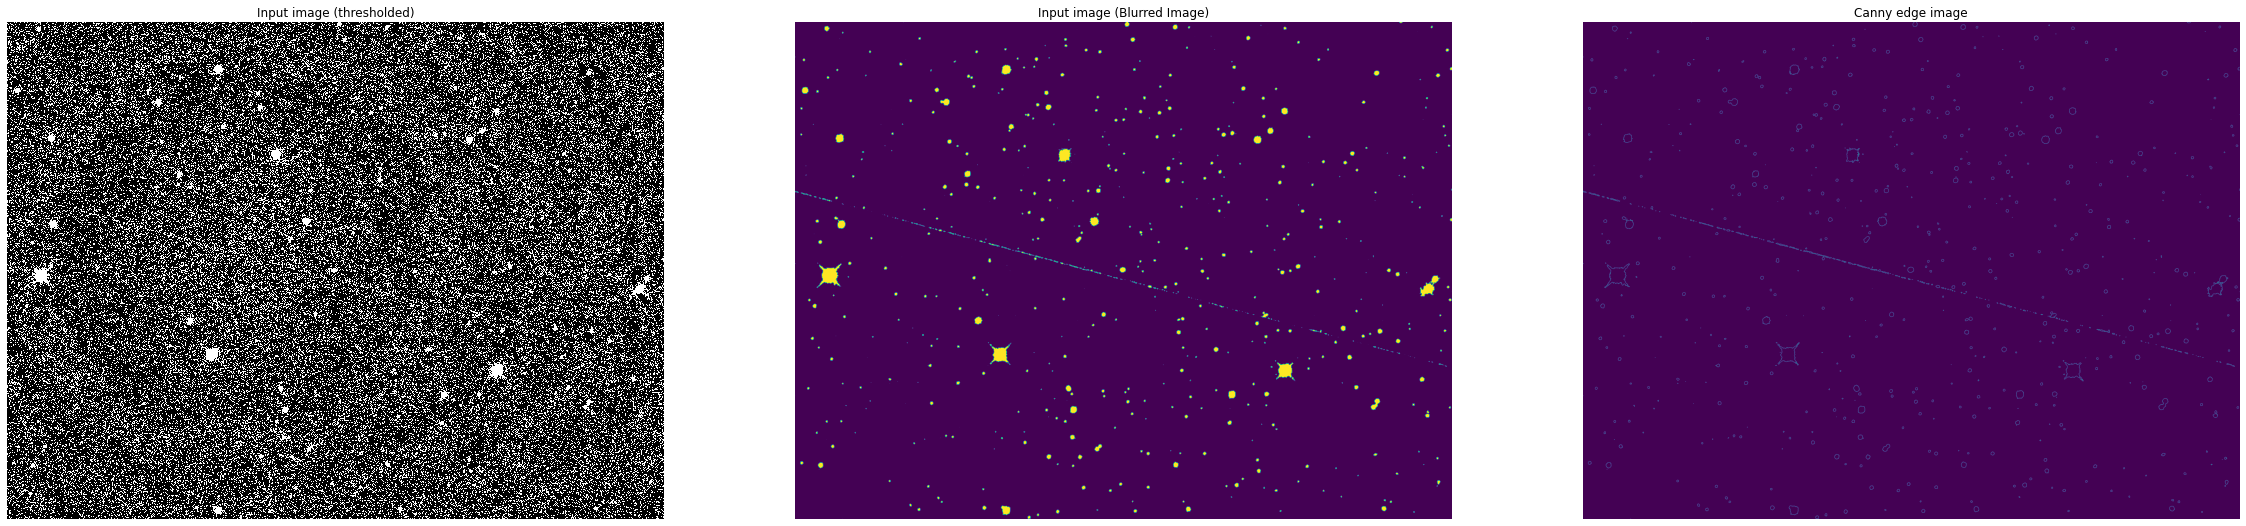

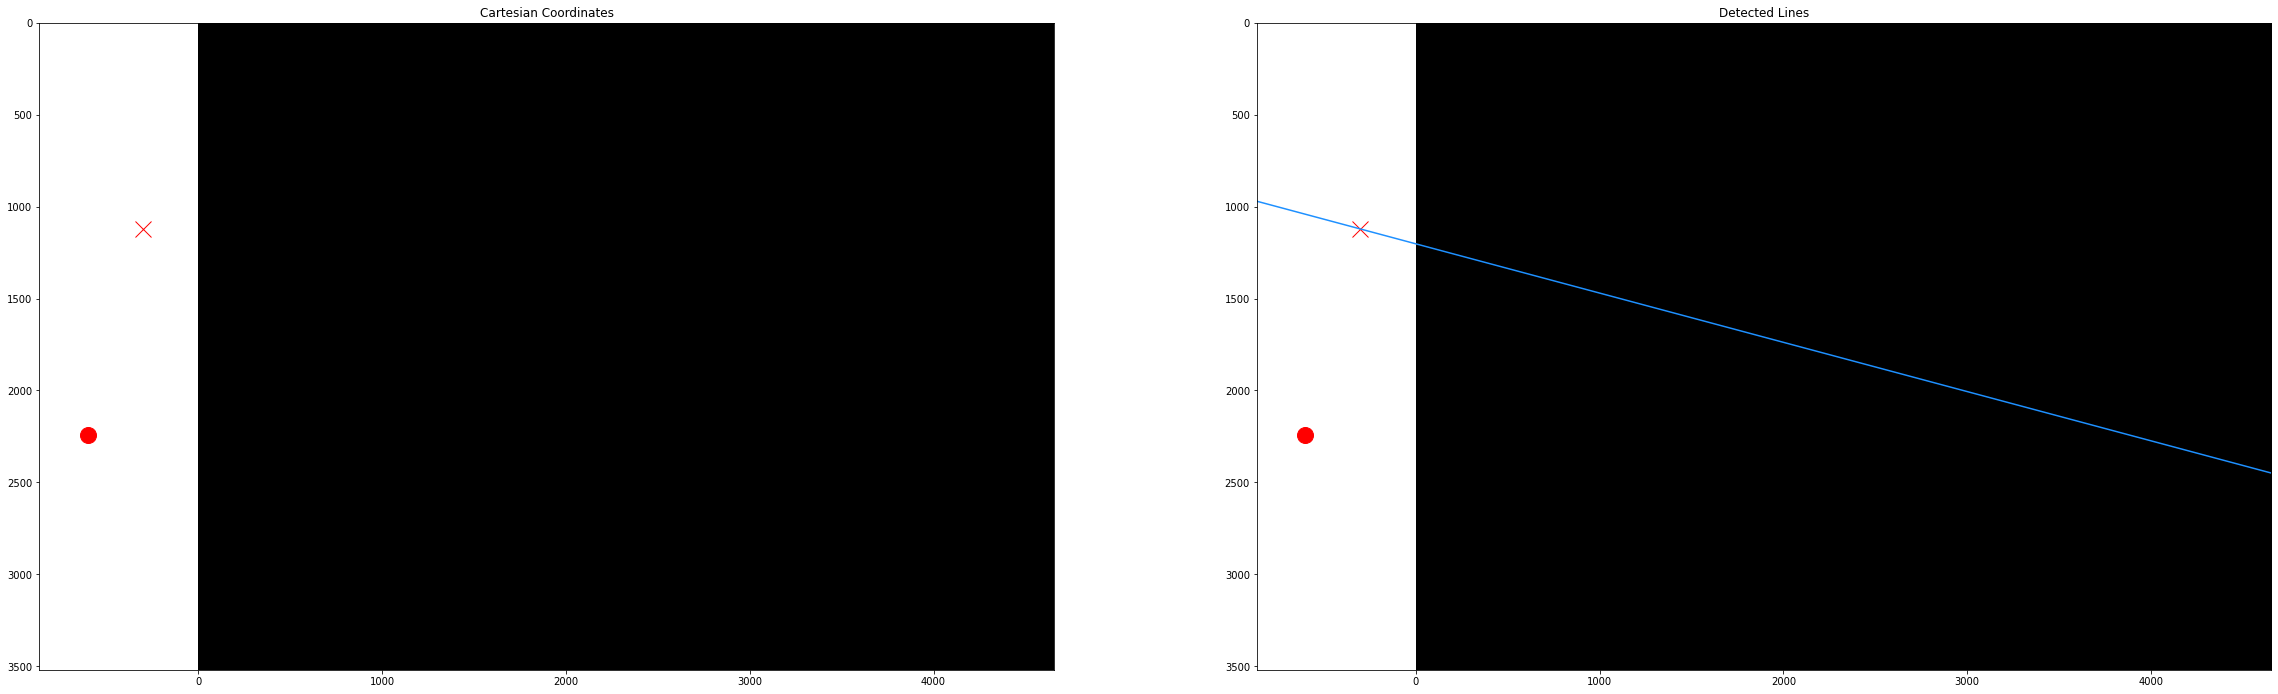

In [5]:
#Plots of line detection
color = ['dodgerblue', 'darkorange', 'green', 'red', 'purple', 'saddlebrown', 'pink', 'gray', 'yellow', 'deepskyblue']

fig, axes = plt.subplots(1, 3, figsize=(40, 40))
ax = axes.ravel()

ld.show(results_ht['Thresholded Image'], cmap="gray", ax=ax[0], interpolation="none")
ax[0].set_title('Input image (thresholded)')
ax[0].set_axis_off()
plt.savefig('thresholded_image.png')


ld.show(results_ht["Blurred Image"], ax=ax[1])
ax[1].set_title('Input image (Blurred Image)')
ax[1].set_axis_off()

ld.show(results_ht["Edges"], ax=ax[2])
ax[2].set_title('Canny edge image')
ax[2].set_axis_off()

# # Save the 'Edges' plot
# plt.figure(figsize=(40, 40))
# plt.imshow(results_ht["Edges"], cmap='gray', interpolation='none')

# # Optional: Add grid lines
# plt.grid(True, which='both', linestyle='-', color='black', linewidth=1)

# # Save the figure as a PNG image
# plt.savefig("./Data/testEdges2.png")

#Detected lines     
fig2, axes2 = plt.subplots(1, 2, figsize=(40, 40))
ax2 = axes2.ravel()

blank_image = np.zeros(detector.image.shape)

ld.show(blank_image, cmap='gray', ax=ax2[0])
ax2[0].set_title('Cartesian Coordinates')
print(results_ht['Cartesian Coordinates'])
for i in range(len(results_ht['Cartesian Coordinates'])):
    ax2[0].plot(results_ht['Cartesian Coordinates'][i][0], results_ht['Cartesian Coordinates'][i][1],'rx', markersize=16)
    ax2[0].plot(results_ht['Cartesian Coordinates1'][i][0], results_ht['Cartesian Coordinates1'][i][1],'ro', markersize=16)

ld.show(blank_image, cmap='gray', ax=ax2[1])
ax2[1].set_title('Detected Lines')
for i in range(len(results_ht['Cartesian Coordinates'])):
    ax2[1].plot(results_ht['Cartesian Coordinates'][i][0], results_ht['Cartesian Coordinates'][i][1],'rx', markersize=16)
    ax2[1].plot(results_ht['Cartesian Coordinates1'][i][0], results_ht['Cartesian Coordinates1'][i][1],'ro', markersize=16)


cart_coords = results_ht['Cartesian Coordinates']
angles = results_ht['Angles']
print(results_ht)
print('Cartesian Coordinates:', cart_coords[0])
print('Angles:', angles[0])
print('slope:', np.tan(angles[0] + np.pi/2))
print('Results_ht[lines]: ', results_ht['Lines'])

for i in range(len(cart_coords)):
    print("i-index: "+str(i))
    print(np.tan(angles[i] + np.pi/2))
    ax2[1].axline(cart_coords[i], slope=np.tan(angles[i] + np.pi/2), c=color[int(clustered_lines[i,-1])])

    # rozgryźć jak dziala funkcja axline i wyciagnac z tego dane przez jakie piksele przechodzi krzywa
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html
    # tutejsze uzycie funkcji to cart_coords[i] jako początkowy xy (x = -300.4889, y = 1121.43988432)
    # gdy podajemy tylko punkt startowy, bez koncowego, to trzeba podać również nachylenie czyli slope - tutaj 0.26794919243

    # pochylenie jest dobre tylko wydawalo sie byc odwrotne poniewaz bez osi nie widziałem że wartosci są de facto odwrócone od standardowego układu 
    # teraz wyliczyc za pomocą tej funkcji f = ax + b (a = 0.26794919243; b = tysiąc z hakiem) przez jakie piksele a więc pozycje RA/DEC 
    # przechodzi streak i porównać ze śladami jakie zostawiły najbliższe satelity 

    # TODO koniecznie zaimplementowac wyciaganie koordynatów poczatku i konca streaka

In [6]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.draw import line
img = np.zeros((15, 15), dtype=np.bool_)
rr, cc = line(0, 0, 14, 14)
img[rr, cc] = 1
rr, cc = line(0, 14, 14, 0)
img[cc, rr] = 1
hspace, angles, dists = hough_line(img)
hspace, angles, dists = hough_line_peaks(hspace, angles, dists)
len(angles)
dists

array([10.,  0.])

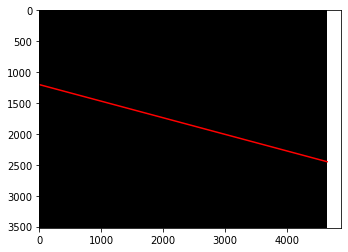

In [7]:
# Rysowanie obrazu
plt.imshow(blank_image, cmap=plt.cm.gray)

# Narysowanie wykrytych linii na obrazie
for angle, dist in zip(results_ht['angles'],results_ht['dists']):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - blank_image.shape[1] * np.cos(angle)) / np.sin(angle)
    plt.plot((0, blank_image.shape[1]), (y0, y1), '-r')

plt.show()

In [8]:
platesolve = plateSolve(filename)
date = platesolve["Datetime"][:-9]
time = platesolve["Datetime"][-8:]
timeOnlyDigits = time.replace(":","")
datetime = f'{date}_{timeOnlyDigits}'

tic
date: 2020-12-27T


KeyError: "Keyword 'RA_DEG' not found."

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def are_lines_close(line1, line2, distance_threshold):
    # Extract endpoints of the lines
    x1_1, y1_1, x2_1, y2_1 = line1[0]
    x1_2, y1_2, x2_2, y2_2 = line2[0]

    # Calculate the midpoints of the lines
    mid_x1 = (x1_1 + x2_1) / 2
    mid_y1 = (y1_1 + y2_1) / 2
    mid_x2 = (x1_2 + x2_2) / 2
    mid_y2 = (y1_2 + y2_2) / 2

    # Calculate the Euclidean distance between the midpoints
    distance = np.sqrt((mid_x2 - mid_x1)**2 + (mid_y2 - mid_y1)**2)

    # Check if the distance is below the threshold
    return distance < distance_threshold

def merge_lines(line1, line2):
    # Extract endpoints of the lines
    x1_1, y1_1, x2_1, y2_1 = line1[0]
    x1_2, y1_2, x2_2, y2_2 = line2[0]

    # Calculate the average endpoints to merge the lines
    merged_line = np.array([[(x1_1 + x1_2) / 2, (y1_1 + y1_2) / 2,
                             (x2_1 + x2_2) / 2, (y2_1 + y2_2) / 2]], dtype=np.int32)

    return merged_line
#TODO images arent being saved automatically, i cant see them anywhere
cv2.imwrite(f'../STM_Final-v1.0/Jack6228-STM_Final-be31d8e/{datetime}/Images/{filename}.png', results_ht["Edges"])

img = cv2.imread(f'./{current_user_filepath}/{filename}.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 50, apertureSize=3)
width = img.shape[1]
height = img.shape[0]
shorterDimension = min(width, height)

# TODO prevent recognition close, parallel streaks as a separated streaks - merge these streaks 
# lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=820, minLineLength=minLineLength, maxLineGap=maxLineGap) # tic.fit, no results for tic2.fit

minLineLength = shorterDimension / 3
maxLineGap = minLineLength / 9
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=500, minLineLength=minLineLength, maxLineGap=maxLineGap) # tic2.fit 2 results for threshold=500
merged_lines = []
for line in lines:
    if not merged_lines:
        merged_lines.append(line)
    else:
        # Check if the current line is close to any existing merged line
        # You need to define a suitable distance threshold
        distance_threshold = 100  # Adjust as needed

        merged = False
        for merged_line in merged_lines:
            if are_lines_close(line, merged_line, distance_threshold):
                # Merge lines (you need to implement this function)
                merged_line = merge_lines(line, merged_line)
                merged = True
                break

        if not merged:
            merged_lines.append(line)

print("detected lines: ",len(lines))
lines = merged_lines
print("merged lines: ",len(lines))
# minLineLength = shorterDimension / 1.5
# maxLineGap = minLineLength / 18
# lines = cv2.HoughLinesP(edges, rho=1.2, theta=np.pi/90, threshold=400, minLineLength=minLineLength, maxLineGap=maxLineGap) # tic3.fit 1 result 

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

scale_percent = 25
scaledWidth = int(width * scale_percent / 100)
scaledHeight = int(height * scale_percent / 100)
dim = (scaledWidth, scaledHeight)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

cv2.imshow("Image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

#TODO use lines to create txt input file for detecting satellite of STM_FINAL github project

detected lines:  7
merged lines:  5


In [ ]:
pixelDegreesSize = platesolve["Pixel Size"]/3600
point0radec = [
    platesolve["Header RA"] - platesolve["Image Size"][1]/2 * pixelDegreesSize,
    platesolve["Header DEC"] - platesolve["Image Size"][0]/2 * pixelDegreesSize
]
for line in lines:
    x1, y1, x2, y2 = line[0]
    
    x1ra = point0radec[0] + x1 * pixelDegreesSize   
    y1dec = point0radec[1] + y1 * pixelDegreesSize
    x2ra = point0radec[0] + x2 * pixelDegreesSize
    y2dec = point0radec[1] + y2 * pixelDegreesSize
    # print(x1ra, y1dec, x2ra, y2dec)

    relative_path = f'../STM_Final-v1.0/Jack6228-STM_Final-be31d8e/{datetime}'

    os.makedirs(relative_path, exist_ok=True)
    os.makedirs(relative_path+'/arch', exist_ok=True)
    os.makedirs(relative_path+'/Fits', exist_ok=True)
    os.makedirs(relative_path+'/Images', exist_ok=True)

    source_file_path = f'./{current_user_filepath}/{filename}.fit'
    destination_folder = f'../STM_Final-v1.0/Jack6228-STM_Final-be31d8e/{datetime}/Fits'
    new_filename = f"{datetime}"

    copy_and_rename_file(source_file_path, destination_folder, new_filename)

    with open(f'../STM_Final-v1.0/Jack6228-STM_Final-be31d8e/{datetime}/streaks_data.txt','w') as f:
        # documentation seems to be depricated so streaks_data uses now only:  self.streaklets.columns = ['Filename','RA1','Dec1','x1','y1','RA2','Dec2','x2','y2'] 
        print(f"{datetime}.fit")
        f.write(f"{datetime}.fit,{x1ra},{y1dec},{x1},{y1},{x2ra},{y2dec},{x2},{y2}")
    
# TODO check if filename (nef?) is being used. At running identification we dont give nef file as a argument, but fit file we do

# python identification.py "2020-12-27" "" "/Images" "/Fits"


File copied successfully to ..\STM_Final-v1.0\Jack6228-STM_Final-be31d8e\2024-01-14_042730\Fits\2024-01-14_042730.fit
File copied successfully to ..\STM_Final-v1.0\Jack6228-STM_Final-be31d8e\2024-01-14_042730\Fits\2024-01-14_042730.fits
2024-01-14_042730.fit


In [ ]:
# raHeader = str(RA_radians)
# raHeader = Decimal(raHeader)
# raHeader = round(raHeader,8)
# print(raHeader)
# print(ra_value)
# print(ra_value - float(raHeader))

# decHeader = str(DEC_radians)
# decHeader = Decimal(decHeader)
# decHeader = round(decHeader,8)
# print(decHeader)
# print(dec_value)
# print(dec_value - float(decHeader))

# wartosci wydaja sie byc za male (po przerzuceniu tych radianów na stopnie, wychodzi wciaz zaledwie ulamek stopnia)
# roznica RA to 0.123 deg, Dec to 0.0316. Natomiast rozmiar pixela 0.31842 arcsec oznacza, że przy połowie szerokości obrazu (4656/2=2328pix) 
# odleglosc ta w stopniach ma wartosc zaledwie 0.2059 deg 
# rozmiar obrazu to około 24.7 x 18.7 arcmin => czyli 0.4116667 x 0.3116667 deg